In [2]:
from watertap.flowsheets.flex_desal.wrd.components.UF_feed_pumps import *
from watertap.flowsheets.flex_desal.wrd.components.ro_system import *
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Read power data from CSV file
power_filepath = "/Users/mhardika/Documents/watertap/watertap/watertap/flowsheets/flex_desal/wrd/data/WRD_power_data_feb_2021.csv"
power_data = pd.read_csv(power_filepath)

flow_filepath = "/Users/mhardika/Documents/watertap/watertap/watertap/flowsheets/flex_desal/wrd/data/WRD_flow_data_feb_2021.csv"
flow_data = pd.read_csv(flow_filepath)

flow_data.head()

/var/folders/32/7c7j3wwd4f749b3d1ccph_w40000gr/T/ipykernel_79673/3525538388.py:3: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,21,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  power_data = pd.read_csv(power_filepath)
/var/folders/32/7c7j3wwd4f749b3d1ccph_w40000gr/T/ipykernel_79673/3525538388.py:6: DtypeWarning: Columns (1,2,15) have mixed types. Specify dtype option on import or set low_memory=False.
  flow_data = pd.read_csv(flow_filepath)


,Date Time,UV1_mgd,UV2_mgd,RO_total_feed_flow_gpm,RO_train1_s1_permeate_flow_gpm,RO_train1_s2_permeate_flow_gpm,RO_train1_s3_permeate_flow_gpm,RO_train2_s1_permeate_flow_gpm,RO_train2_s2_permeate_flow_gpm,RO_train2_s3_permeate_flow_gpm,RO_train3_s1_permeate_flow_gpm,RO_train3_s2_permeate_flow_gpm,RO_train3_s3_permeate_flow_gpm,RO_train4_s1_permeate_flow_gpm,RO_train4_s2_permeate_flow_gpm,RO_train4_s3_permeate_flow_gpm,RO_total_permeate_flow_gpm
0,2/1/21 0:01,6.706259251,6.546586514,9847.649414,1576.329956,645.039978,291.3899841,1449.869995,651.5499878,269.4899902,1499.089966,649.4500122,237.8600006,1430.52002,650.6300049,0.089999996,9351.309894
1,2/1/21 0:02,6.706259251,6.546586514,9832.929688,1591.689941,643.6900024,291,1442.429932,645.5899658,269.4799805,1479.839966,650.5799561,237.5099945,1413.539917,650.7799683,0.089999996,9316.219623
2,2/1/21 0:03,6.706259251,6.546586514,9845.959961,1575.589966,634.9899902,291.7399902,1448.699951,648.3099976,269.1099854,1462.709961,649.3599854,237.5099945,1456.349976,648.5499878,0.089999996,9323.009785
3,2/1/21 0:04,6.706259251,6.546586514,9873.759766,1559.699951,641.8699951,291.7099915,1452.679932,648.9599609,268.7200012,1491.76001,649.3299561,237.1799927,1444.689941,650.5299683,0.089999996,9337.219700
4,2/1/21 0:05,6.706259251,6.546586514,9833.179688,1580.169922,644.7799683,291.0299988,1462.569946,645.3599854,269.1099854,1502.299927,649.1400146,237.5499878,1438.98999,648.8699951,0.099999994,9369.969720


In [4]:
power_data.head(2)

,Date Time,UF_pump1_power_kW,UF_pump2_power_kW,UF_pump3_power_kW,UF_pump4_power_kW,PRO_feed_pump1_kW,PRO_feed_pump2_kW,PRO_feed_pump3_kW,PRO_feed_pump4_KW,PRO_interstage_pump1_kW,...,TSRO_feed_pump3_kW,TSRO_feed_pump4_kW,UV1_kW,UV2_kW,decarb_blower1_kW,decarb_blower2_kW,plant_power_demand_total_kW,UF_system_total_kW,RO_system_total_kW,other_systems_total_kW
0,2/1/21 0:01,73.68326668,0,175.2331993,177.2694926,205.8575954,201.4474653,207.909708,195.5472168,23.04414937,...,20.55105613,0,108.3842793,106.3133011,0,2.532704553,1593.403324,435.0798895,930.0632964,218.0302848
1,2/1/21 0:02,73.00459849,0,175.2471988,177.2548258,205.8702613,201.3634643,207.9557084,195.5285502,23.05281615,...,20.56772287,0,108.3842793,106.3133011,0,2.532037885,1612.50403,435.1725557,929.9706282,218.0296182


In [7]:
def get_uf_performance(flow):
    split_fractions = [
        0.4,
        0.4,
        0.2,
    ]  # Based on ratio of pump capacity to total capacity
    config = "/Users/mhardika/Documents/watertap/watertap/watertap/flowsheets/flex_desal/wrd/meta_data/wrd_uf_pumps_inputs.yaml"

    m = build_UF_pumps_system(split_fractions=split_fractions, config=config)

    set_UF_pumps_inlet_conditions(m.fs.UF_pumps, Qin=flow)
    set_UF_pump_op_conditions(m.fs.UF_pumps)

    init_UF_pumps(m.fs.UF_pumps)
    solve(m)

    add_costing(m)
    add_UF_pumps_costing(m, m.fs.UF_pumps)
    m.fs.costing.cost_process()
    m.fs.costing.initialize()

    solve(m)

    print("Degrees of Freedom: ", degrees_of_freedom(m))

    # Electricity consumption
    return m.fs.costing.aggregate_flow_electricity()


get_uf_performance(0.154)


     =======> BUILDING ULTRAFILTRATION SYSTEM <=======      

Parent directory: /Users/mhardika/Documents/watertap/watertap/watertap/flowsheets/flex_desal/wrd


-------------------- INITIALIZING ULTRAFILTRATION --------------------


UF Pumps Degrees of Freedom: 0



2025-10-02 10:34:22 [INFO] idaes.init.fs.UF_pumps.feed_in: Initialization Step Complete.
2025-10-02 10:34:22 [INFO] idaes.init.fs.UF_pumps.feed_splitter: Initialization Step 2 Complete: optimal - Optimal Solution Found
2025-10-02 10:34:22 [INFO] idaes.init.fs.UF_pumps.pump_1.control_volume: Initialization Complete
2025-10-02 10:34:22 [INFO] idaes.init.fs.UF_pumps.pump_1: Initialization Complete: optimal - Optimal Solution Found
2025-10-02 10:34:22 [INFO] idaes.init.fs.UF_pumps.pump_outlet_mixer: Initialization Complete: optimal - Optimal Solution Found
2025-10-02 10:34:22 [INFO] idaes.init.fs.UF_pumps.feed_out: Initialization Step Complete.
2025-10-02 10:34:22 [INFO] idaes.init.fs.UF_pumps.pump_2.control_volume: Initializ

107.28872916866314

In [112]:
# Plot UF performance
# Clear output
from IPython.display import clear_output

n = 40100
step = 2000

uf_power = []
uf_time = []
for index, row in flow_data[0:n:step].iterrows():
    print(f"Processing row {index}")
    flow_gpm = row["RO_total_feed_flow_gpm"]
    flow_m3_per_s = float(flow_gpm) * 0.0000630902  # Convert GPM to m3/s
    uf_power.append(get_uf_performance(flow_m3_per_s))
    uf_time.append(row["Date Time"])
    clear_output()

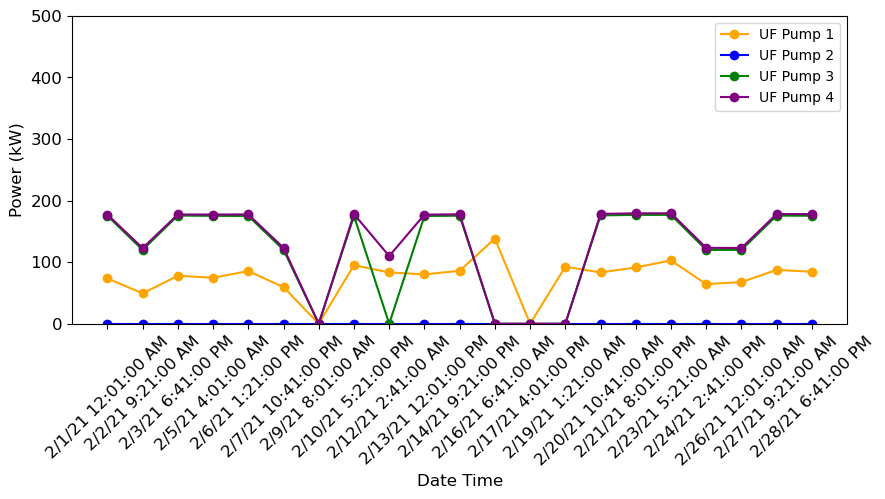

In [110]:
# Plot the measured UF power data from the power_data DataFrame
fig, ax = plt.subplots(figsize=(10, 4))

# Plot each UF pump
power_data_time = power_data[0:n:step]["Date Time"]
ax.plot(
    power_data_time,
    power_data[0:n:step]["UF_pump1_power_kW"].astype(float),
    label="UF Pump 1",
    color="orange",
    marker="o",
)
ax.plot(
    power_data_time,
    power_data[0:n:step]["UF_pump2_power_kW"].astype(float),
    label="UF Pump 2",
    color="blue",
    marker="o",
)
ax.plot(
    power_data_time,
    power_data[0:n:step]["UF_pump3_power_kW"].astype(float),
    label="UF Pump 3",
    color="green",
    marker="o",
)
ax.plot(
    power_data_time,
    power_data[0:n:step]["UF_pump4_power_kW"].astype(float),
    label="UF Pump 4",
    color="purple",
    marker="o",
)

ax.set_xlabel("Date Time", fontsize=12)
ax.set_ylim(0, 500)
ax.set_ylabel("Power (kW)", fontsize=12)
# ax.set_title('Measured vs Modeled UF Power Consumption')
ax.legend()
plt.xticks(rotation=45)

# Increase the size of the x-axis and y-axis labels
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)

plt.show()

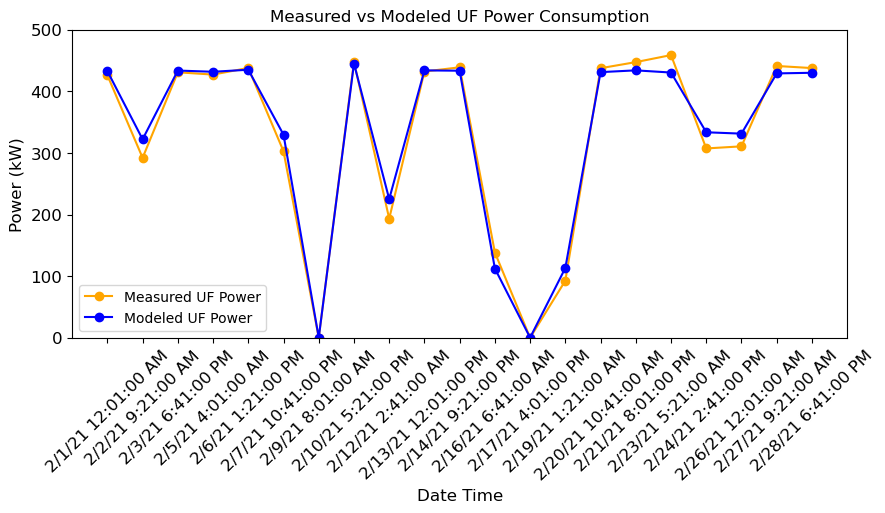

In [113]:
# Plot the measured UF power data from the power_data DataFrame
fig, ax = plt.subplots(figsize=(10, 4))

power_data_time = power_data[0:n:step]["Date Time"]
# Convert to float
power_data_uf = (
    power_data[0:n:step]["UF_pump1_power_kW"].astype(float)
    + power_data[0:n:step]["UF_pump2_power_kW"].astype(float)
    + power_data[0:n:step]["UF_pump3_power_kW"].astype(float)
    + power_data[0:n:step]["UF_pump4_power_kW"].astype(float)
)
ax.plot(
    power_data_time,
    power_data_uf,
    label="Measured UF Power",
    color="orange",
    marker="o",
)
ax.plot(power_data_time, uf_power, label="Modeled UF Power", color="blue", marker="o")
ax.set_xlabel("Date Time", fontsize=12)
ax.set_ylim(0, 500)
ax.set_ylabel("Power (kW)", fontsize=12)
ax.set_title("Measured vs Modeled UF Power Consumption")
ax.legend()
plt.xticks(rotation=45)

# Increase the size of the x-axis and y-axis labels
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)

plt.show()

In [6]:
def get_ro_performance(flow):
    m = build_system(number_trains=4, number_stages=3)
    set_inlet_conditions(m.fs.ro_system, Qin=flow, Cin=0.542)
    set_ro_system_op_conditions(m.fs.ro_system)
    add_ro_scaling(m.fs.ro_system)
    initialize_ro_system(m.fs.ro_system)
    m.fs.obj = Objective(
        expr=m.fs.ro_system.permeate.properties[0].flow_vol_phase["Liq"]
    )
    results = solver.solve(m)

    return (
        m.fs.ro_system.total_power_consumption(),
        m.fs.ro_system.permeate.properties[0].flow_vol_phase["Liq"](),
    )


get_ro_performance(0.154 * 4)

Degrees of freedom after adding units: 124
2025-10-02 10:34:02 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.ro_system.train_1.ro_stage_1.feed_side.area
2025-10-02 10:34:02 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.ro_system.train_1.ro_stage_2.feed_side.area
2025-10-02 10:34:02 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.ro_system.train_1.ro_stage_3.feed_side.area
2025-10-02 10:34:02 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.ro_system.train_2.ro_stage_1.feed_side.area
2025-10-02 10:34:02 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.ro_system.train_2.ro_stage_2.feed_side.area
2025-10-02 10:34:03 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.ro_system.train_2.ro_stage_3.feed_side.area
2025-10-02 10:34:03 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.ro_system.train_3.ro_stage_1.feed_side.area
2025-10-02 10:34:03 [WARNING] idaes.core.util.scaling:

(881.9146628821786, 0.5766033106045662)

In [ ]:
# Clear output
from IPython.display import clear_output

n = 40100
step = 2000
ro_power = []
ro_permeate = []
for index, row in flow_data[0:n:step].iterrows():
    print(f"Processing row {index}")
    flow_gpm = row["RO_total_feed_flow_gpm"]
    flow_m3_per_s = float(flow_gpm) * 0.0000630902  # Convert GPM to m3/s
    try:
        temp_power, temp_permeate = get_ro_performance(flow_m3_per_s)
        ro_power.append(temp_power)
        ro_permeate.append(temp_permeate)
    except Exception as e:
        print(f"Error processing row {index}: {e}")
        ro_power.append(0)
        ro_permeate.append(0)

    clear_output()

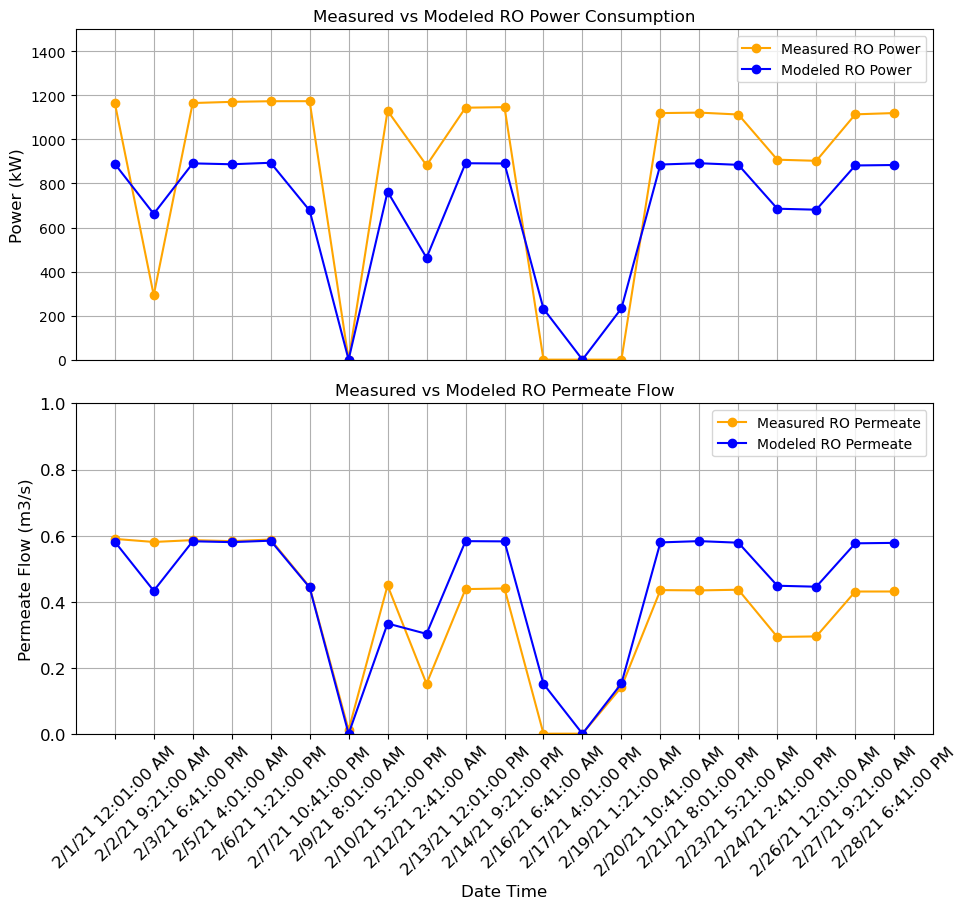

In [118]:
# Replicate comparison for RO

fig, (ax, ax1) = plt.subplots(2, 1, figsize=(10, 8))

power_data_time = power_data[0:n:step]["Date Time"]
# Convert to float
power_data_ro = (
    power_data[0:n:step]["PRO_feed_pump1_kW"].astype(float)
    + power_data[0:n:step]["PRO_feed_pump2_kW"].astype(float)
    + power_data[0:n:step]["PRO_feed_pump1_kW"].astype(float)
    + power_data[0:n:step]["PRO_feed_pump1_kW"].astype(float)
    + power_data[0:n:step]["PRO_interstage_pump1_kW"].astype(float)
    + power_data[0:n:step]["PRO_interstage_pump2_kW"].astype(float)
    + power_data[0:n:step]["PRO_interstage_pump1_kW"].astype(float)
    + power_data[0:n:step]["PRO_interstage_pump1_kW"].astype(float)
    + power_data[0:n:step]["TSRO_feed_pump1_kW"].astype(float)
    + power_data[0:n:step]["TSRO_feed_pump2_kW"].astype(float)
    + power_data[0:n:step]["TSRO_feed_pump1_kW"].astype(float)
    + power_data[0:n:step]["PRO_feed_pump1_kW"].astype(float)
)

ax.plot(
    power_data_time,
    power_data_ro,
    label="Measured RO Power",
    color="orange",
    marker="o",
)
ax.plot(power_data_time, ro_power, label="Modeled RO Power", color="blue", marker="o")
# ax.set_xlabel('Date Time', fontsize=12)
ax.set_ylim(0, 1500)
ax.set_ylabel("Power (kW)", fontsize=12)
ax.set_title("Measured vs Modeled RO Power Consumption")
ax.legend()
ax.grid()

# Hide x ticks for the first plot
ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)


# Convert to float
permeate_data_ro = flow_data[0:n:step]["RO_total_permeate_flow_gpm"].astype(float)
permeate_data_ro = permeate_data_ro * 0.0000630902  # Convert gpm to m3/s
ax1.plot(
    power_data_time,
    permeate_data_ro,
    label="Measured RO Permeate",
    color="orange",
    marker="o",
)
ax1.plot(
    power_data_time, ro_permeate, label="Modeled RO Permeate", color="blue", marker="o"
)
ax1.set_xlabel("Date Time", fontsize=12)
ax1.set_ylim(0, 1)
ax1.set_ylabel("Permeate Flow (m3/s)", fontsize=12)
ax1.set_title("Measured vs Modeled RO Permeate Flow")
ax1.legend()
ax1.grid()


# Increase the size of the x-axis and y-axis labels
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
## Convert to float and calculate the sum
# Replace NULL with 0

flow_data["RO_total_feed_flow_gpm"] = flow_data["RO_total_feed_flow_gpm"].replace(
    "Null", 0
)
# for index, row in flow_data.iterrows():
#     print(index)
#     row['RO_total_feed_flow_gpm'] = float(row['RO_total_feed_flow_gpm'])

flow = (
    flow_data["RO_total_feed_flow_gpm"].astype(float).sum() * 0.0000630902
)  # Convert GPM to m3/s
print(f"Total RO feed flow: {flow} m3/s")

ammonia_cost = 500

print("Cost of adding ammonia: $", ammonia_cost * flow)

Total RO feed flow: 19574.908890659026 m3/s
Cost of adding ammonia: $ 9787454.445329513
